# Biodiversity in National Parks

### In this project I'm Seeking for any patterns that could explain why some species in this dataset are endangered!

 For this purpose we are loading the data, perform some EDA, calculate a bunch of aggregates and plot some visualizations to find those patterns!

In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [59]:
ob = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [60]:
ob

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [61]:
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [62]:
species.dropna(subset='conservation_status', inplace=True)

In [63]:
species.conservation_status.value_counts(dropna=False)

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

In [64]:
print(f"Parks list: {ob['park_name'].unique()}")

Parks list: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [65]:
conservation_category = species.groupby(['category', 'conservation_status']).scientific_name.count().unstack()
conservation_category

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1.0,NaN,4.0,2.0
Bird,4.0,3.0,72.0,NaN
Fish,3.0,NaN,4.0,4.0
Mammal,7.0,1.0,28.0,2.0
Nonvascular Plant,NaN,NaN,5.0,NaN
Reptile,NaN,NaN,5.0,NaN
Vascular Plant,1.0,NaN,43.0,2.0


<Axes: xlabel='category'>

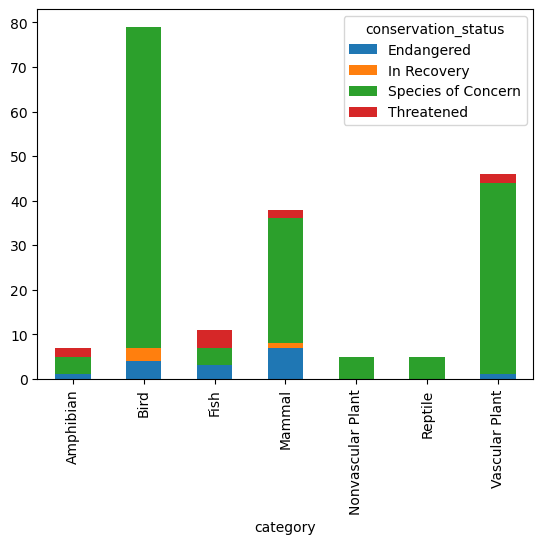

In [66]:
conservation_category.plot(kind='bar', stacked=True)

In [67]:
species['isprotected'] = species['conservation_status'] != 'Threatened'

In [80]:
df = species.groupby(['category', 'isprotected']).scientific_name.nunique().unstack().reset_index()

In [81]:
df

isprotected,category,False,True
0,Amphibian,2.0,5.0
1,Bird,NaN,75.0
2,Fish,4.0,7.0
3,Mammal,2.0,28.0
4,Nonvascular Plant,NaN,5.0
5,Reptile,NaN,5.0
6,Vascular Plant,2.0,44.0


In [97]:
df.fillna(0, inplace=True)
df['percentprotected'] = df[True]  / (df[False] + df[True]) * 100
df

isprotected,category,False,True,percentprotected
0,Amphibian,2.0,5.0,71.428571
1,Bird,0.0,75.0,100.000000
2,Fish,4.0,7.0,63.636364
3,Mammal,2.0,28.0,93.333333
4,Nonvascular Plant,0.0,5.0,100.000000
5,Reptile,0.0,5.0,100.000000
6,Vascular Plant,2.0,44.0,95.652174
